<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/InfoGAN_Interpretable_Representation_Learning_by_Information_Maximizing_Generative_Adversarial_Nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **InfoGAN: Interpretable Representation Learning by Information Maximizing Generative Adversarial Nets**

논문 링크: https://arxiv.org/abs/1606.03657

InfoGAN을 살펴보기 전에, GAN의 어떤 문제점을 보완했는지 알아보기 위해 기존 GAN의 문제점을 살펴보겠다. GAN은 특정 개수의 noise가 신경명알 거쳐 어떠한 데이터를 만들어 낸다. 여기서 **noise의 분포가 꼬였는(entangled) 것**이 문제였다.

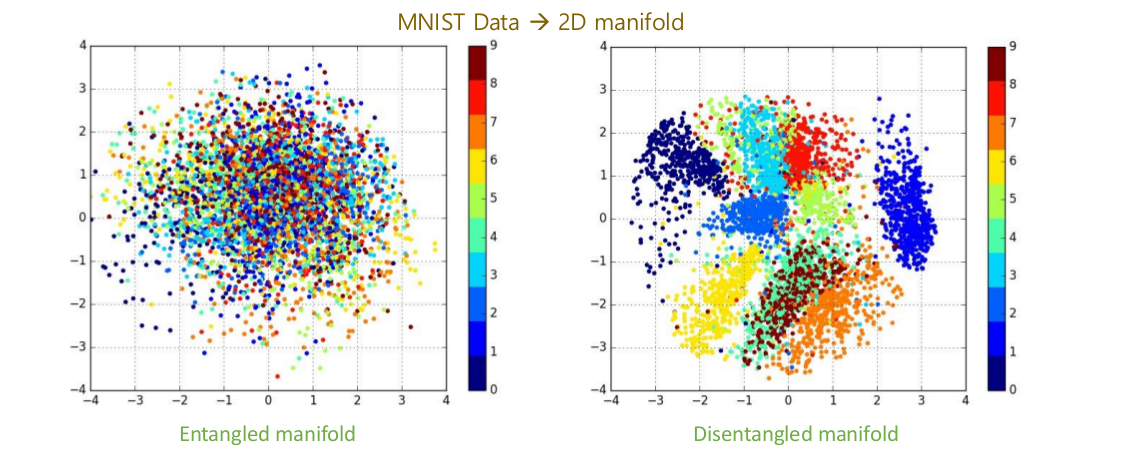

위 사진의 출처: 이활석님

위의 사진에서 왼쪽 분포를 보면 데이터들이 무질서하게 배치되어 있는 것을 볼 수 있다. 이런 분포를 꼬였다라고 표현한다. 당연하게도 이렇게 데이터들이 꼬여있으면 유의미한 정보를 파악하기 어렵다. 즉, GAN은 데이터의 분포가 꼬여있기 때문에 노이즈를 연속적으로 변화시켜도 만들어지는 이미지가 연속적이지 않다.

그러면 위의 사진에서 오른쪽 분포와 같이 어떠한 의미를 갖도록 하려면 어떻게 해야할까? 오른쪽 사진을 보면 MNIST 데이터에서 숫자를 기준으로 일련의 클러스트를 이루고 있는 것을 확인할 수 있다. **이런 분포를 풀려있다(disentagled)**라고 하는데, 만일 기존 GAN에서 이러한 방식으로 noise 분포를 표현할려면 label를 달아줘야 한다. 하지만 label을 달지 않고 unsupervised learning을 할 수 있으면 어떨까?

## **Info GAN 구조**

InfoGAN은 **기존 GAN에 entropy와 상호정보량(mutual information)이라는 정보이론(information theory)을 반영하여 unsupervised learning만으로 데이터의 특징을 적절히 표현**할 수 있다.

여기서 문제점은 바로 unsupervised learning을 어떻게 시킬 것인지가 제일 큰 관건이 었는데, 그 이유는 기존 100차원의 noise에 몇 개의 값을 추가한다고 한들, Generator가 noise를 사용하는 방식에는 어떠한 제한도 없었기 때문에 추가해도 noise의 차원이 늘어나는 효과 그 이상 이하도 아니였다.

그래서 InfoGAN은 Loss function에 추가적인 항을 덧붙이는 방식으로 이를 커버했는데, **기존 GAN에 쓰이는 noise z**와 **분포에서 중요한 값을 표현하는 사용하는 노이즈 c**를 활용했다. 즉, **c를 unsupervised leaning을 통해 학습시키겠다는 뜻**이다. 더욱 자세한 내용은 아래의 Loss function을 살펴보면서 알아보겠다.

### **Loss function**

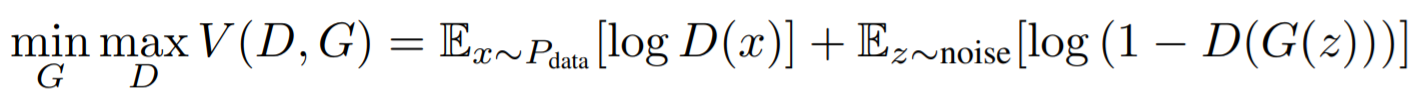

먼저 위의 식은 기존 GAN의 Loss function인데, 이는 GAN 논문에서 살펴봤으니 넘어가겠다.

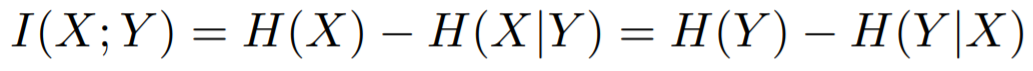

위의 식은 **Mutual Information(상호정보량)** 식이다. 간단하게 설명하자면 X와 Y의 상호정보량을 I(X; Y)로 표현하고 이는 Y를 알 때, X의 불확실성이 얼마나 감소하는지를 나타낸다. 만약 X와 Y가 independent 즉, 독립 관계이면 Y와 X 사이의 연관성이 하나도 없기 때문에 I(X; Y)의 값은 0이 되겠다.

Information Theory에 대해 더 자세히 알고 싶으면: https://github.com/viriditass/Miscellaneous/blob/main/Information_Theory.ipynb 를 참고하면 된다.

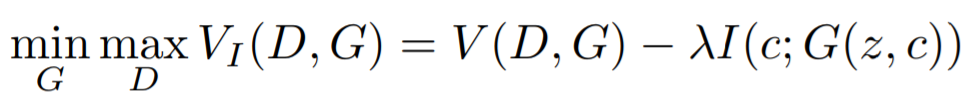

위의 그림이 바로 InfoGAN의 Loss function이다. 해당 식에서 V(D, G)는 일반 GAN의 Loss fucntion이다. D의 입장은 기존 GAN과 같고, G의 입장이 추가되었다. G의 입장을 보면 위의 함수를 minimum하게 해야하기 때문에 I(c; G(z, c))를 최대화해야한다. 즉, 이는 **latent code c와 Generator가 만들어내는 sample들의 분포 G(z, c)가 높은 상호정보량을 가져한다**는 것이다.

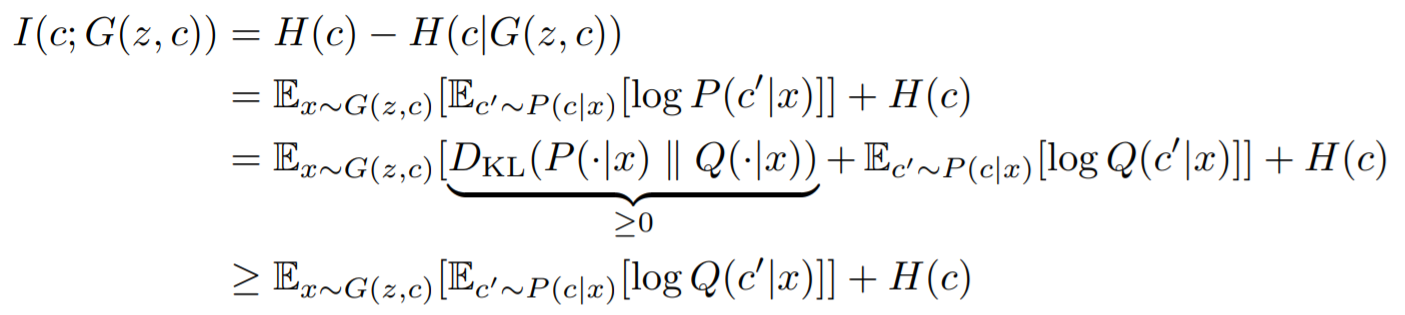

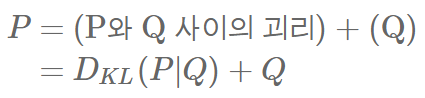

1번째 위 식은 Entropy - Cross Entropy 꼴인데 여기서 2번째 식을 활용하여 식을 풀어준다. 하지만, 이 과정에서 P(c|x)를 알아야만 위의 상호정보량을 구할 수 있다는 문제가 발생한다.

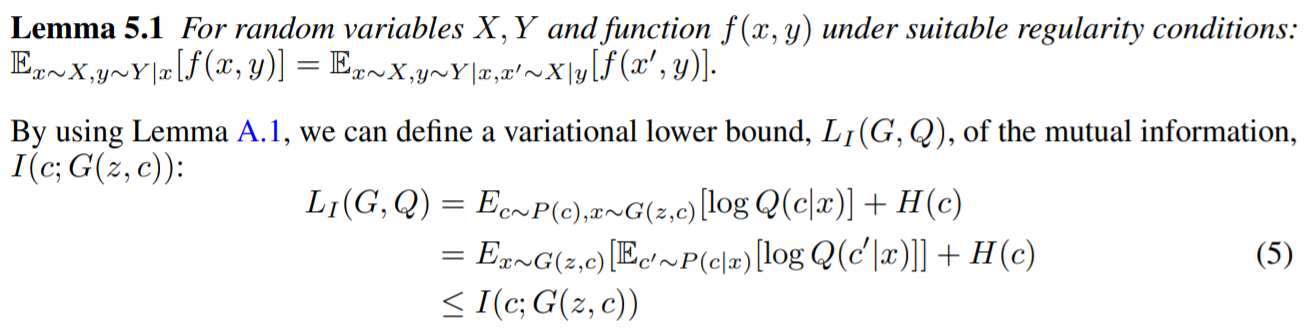

(식이 아래에서 위로 전개되었다.)

이에 **Auxiliary Distribution Q(c|x)를 이용해 L1(G, Q)를 I(c; G(z, c))의 lower bound(하향선)**이 되게 한다. 즉, 상호정보량을 직접 구하는 대신 구하기 쉬운 Q를 사용해 하한선을 표현하고 이 **lower bound(하한선)을 최대화**하는 것이다. 이를 **Variational Information Maximization**이라고 한다. 즉, 이를 통해 **p(c|x)를 필요로 하는 부분을 Law of total Expectation을 이용해 계산**했다.

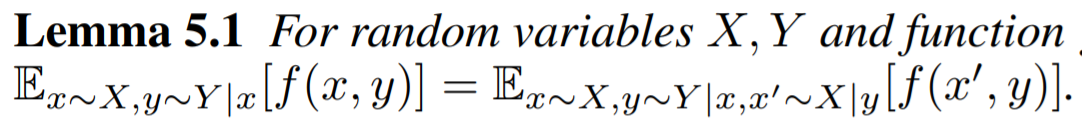

위 이미지는 아까 전의 이미지에서 **아담의 정리** 부분만을 빼온 것인데,

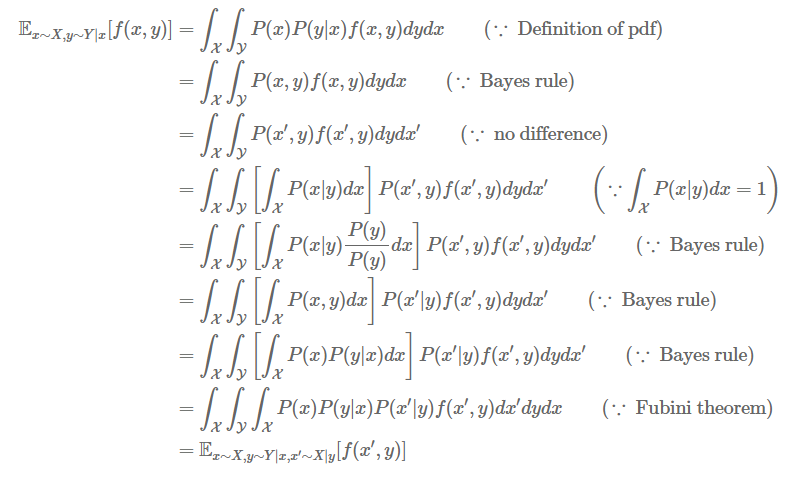

이를 정명하면 위와 같이 된다. 해당 증명은 임성빈 박사님의 증명이다.

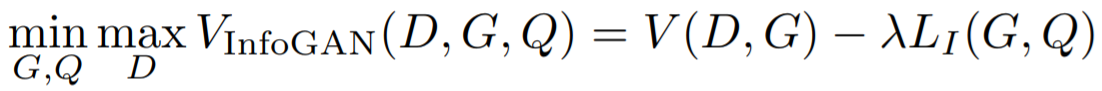

Q를 사용해 Loss function을 재정의하면 위와 같은 식이 된다.

### **Architecture & Pytorch**



구조는 데이터들을 고려해서 총 5개를 만들었다.

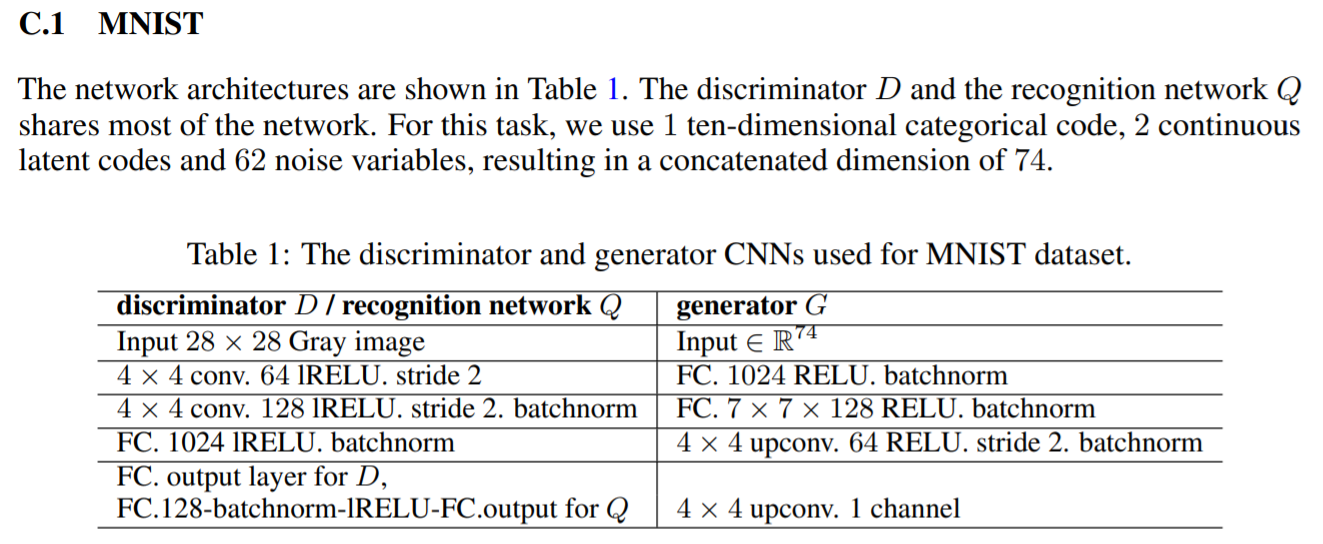

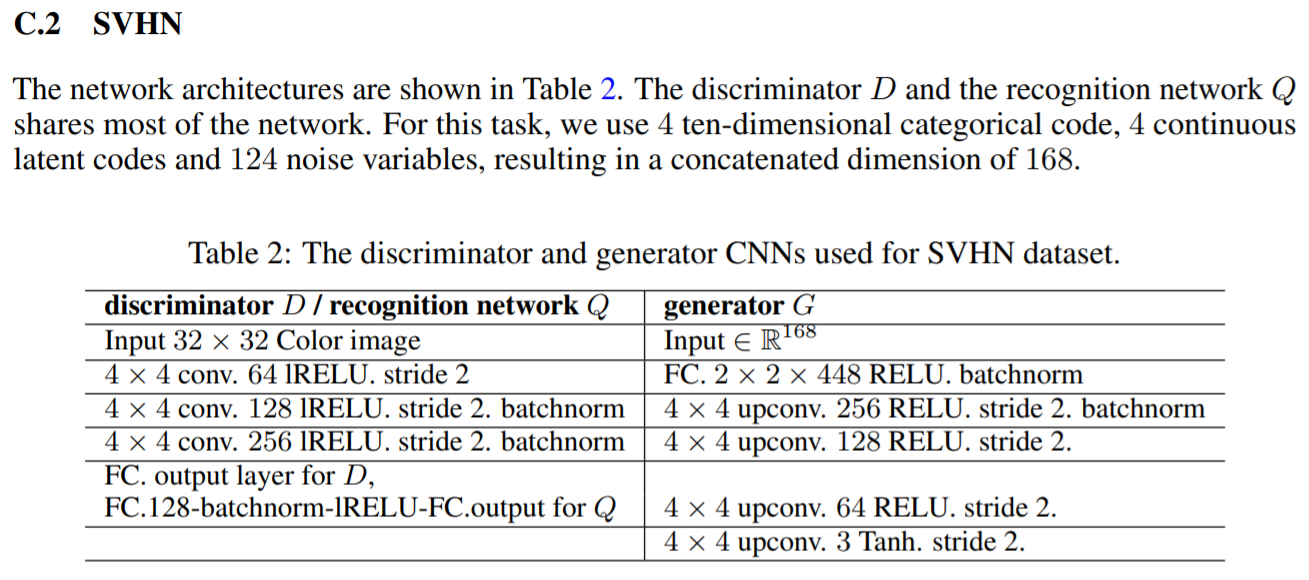

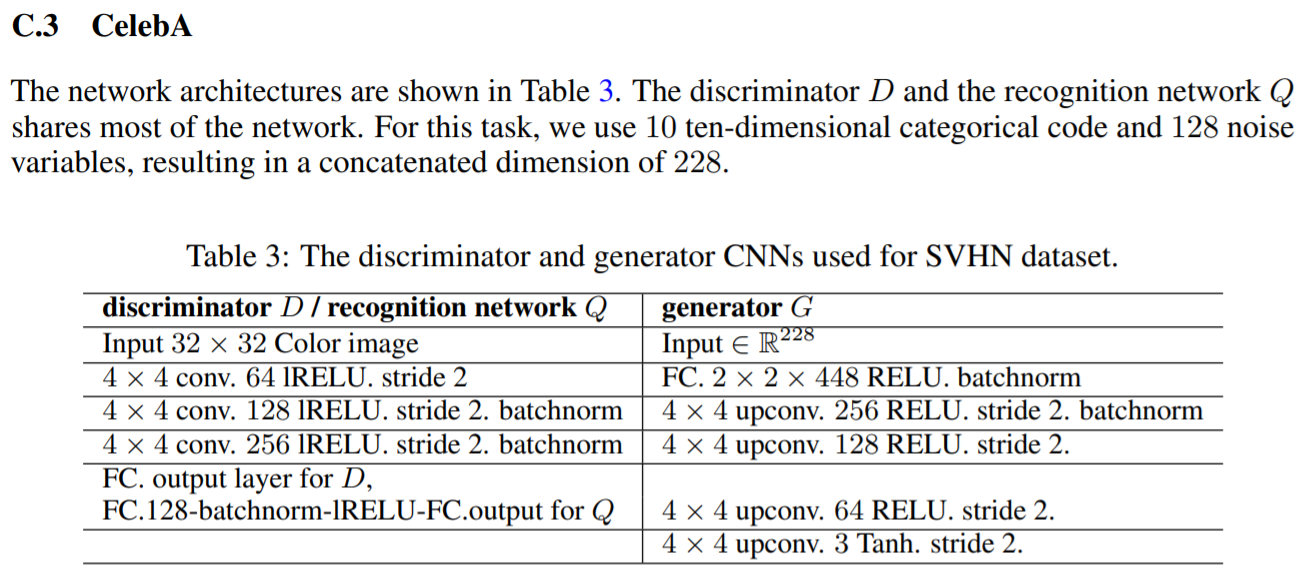

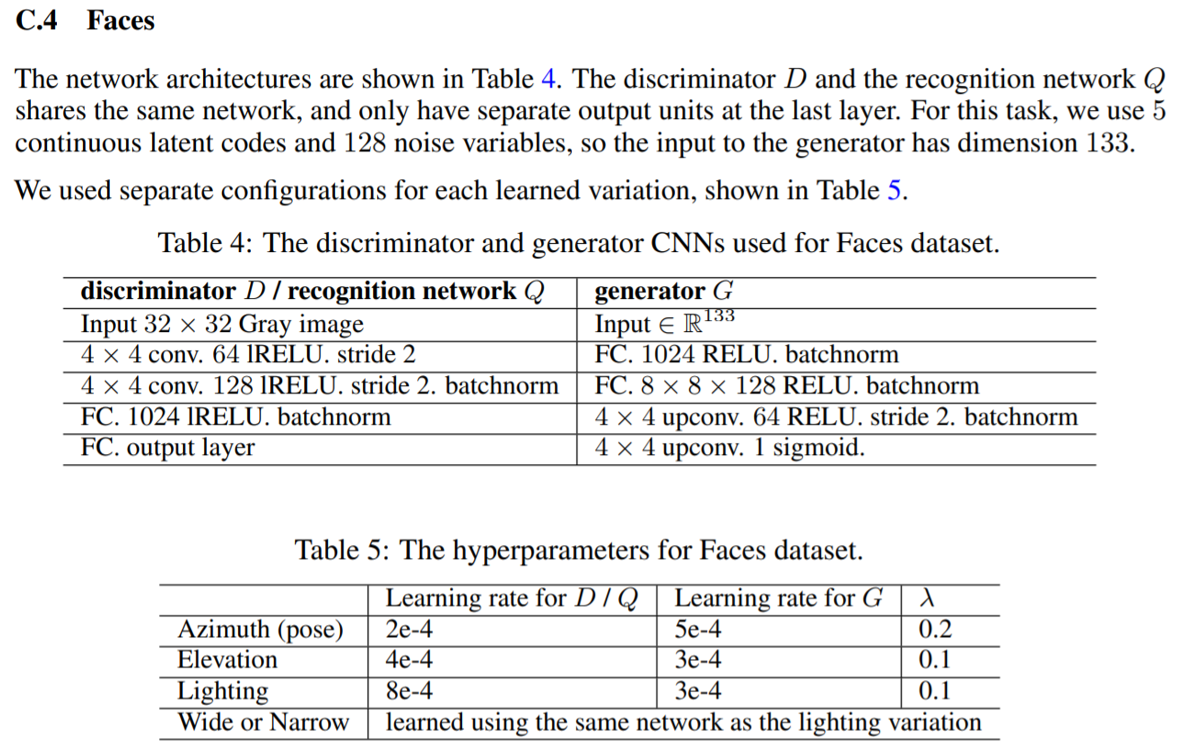

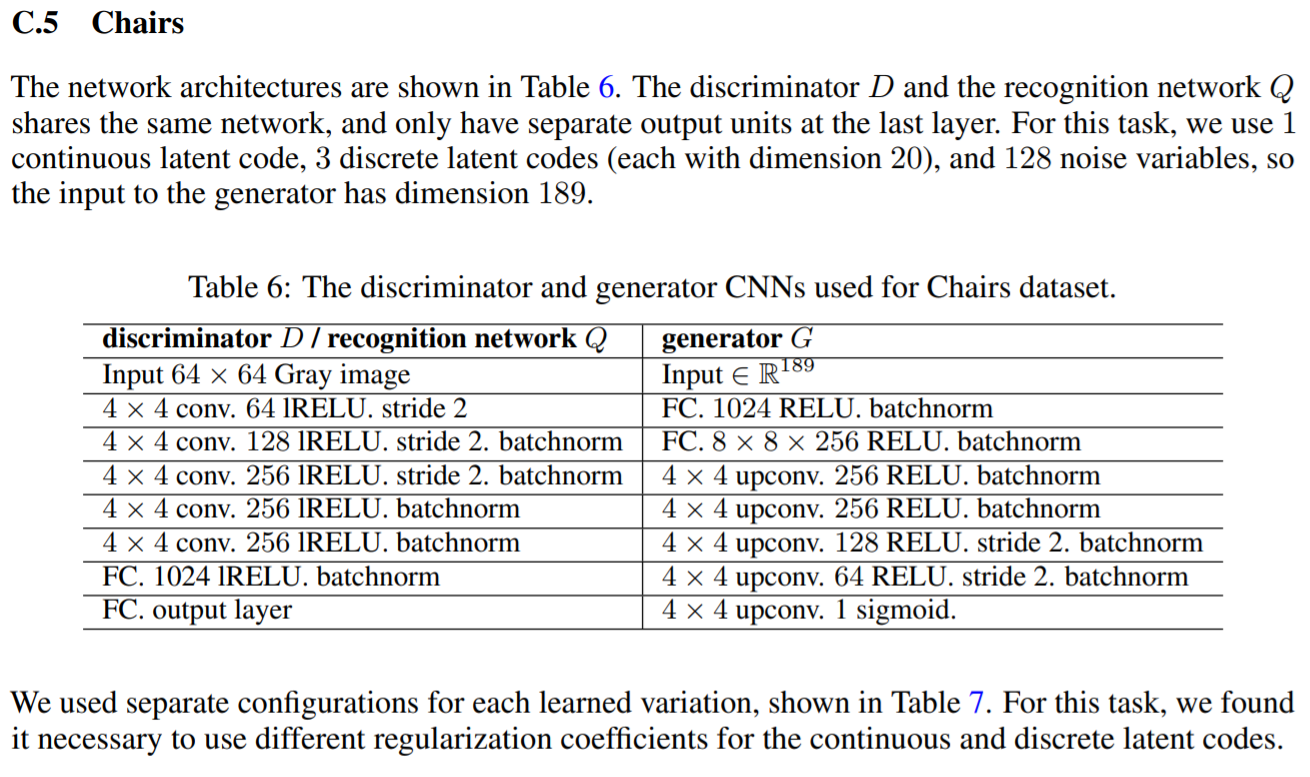

모두 다 적으면 코드가 너무 길어지기 때문에, MNIST에 대한 코드만 올려놓겠다.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# InfoGAN Generator
class Generator(nn.Module):
    def __init__(self, dataset='MNIST', z_dim=62, cc_dim=2, dc_dim=1):
        # noise variable = z_dim (MNIST인 경우,  62)
        # continous latent codes = cc_dim (MNIST의 경우, 2)
        # ten-dimensional categorical code = dc_dim (MNIST의 경우, 1 => 1 * 10)
        # concatenated dimension = (MNIST의 경우 62 + 2 + 1 * 10)
        super(Generator, self).__init__()

        self.dataset = dataset

        if self.dataset == 'MNIST':
            self.dec_fc = nn.Sequential(
                nn.Linear(z_dim + cc_dim + (dc_dim * 10), 1024),
                nn.BatchNorm2d(1024),
                nn.ReLU(),

                nn.Linear(1024, 128 * 7 * 7, bias=False),
                nn.BatchNorm2d(128 * 7 * 7),
                nn.ReLU()
            )

            # [-1, 128, 7, 7] => [-1, 64, 14, 14]

            self.dec_conv = nn.Sequential(
                # [-1, 128, 7, 7] => [-1, 64, 14, 14]
                nn.ConvTranspose2d(128, 64, 4, 2, 1),
                nn.BatchNorm2d(64),
                nn.ReLU(),

                nn.ConvTranspose2d(64, 1, 4, 2, 1),
                nn.Tanh()
            )
            

    def forward(self, x):
        if self.dataset == 'MNIST':
            # [-1, z]
            x = self.dec_fc(x)

            # [-1, 128 * 7 * 7] => [-1, 128, 7, 7]
            x = x.view(-1, 128, 7, 7)
            x = self.dec_conv(x)
        
        return x


# InfoGAN Discriminator
class Discriminator(nn.Module):
    def __init__(self, dataset='MNIST', cc_dim=2, dc_dim=1):
        # continous latent codes = cc_dim (MNIST의 경우, 2)
        # ten-dimensional categorical code = dc_dim (MNIST의 경우, 1 => 1 * 10)
        super(Discriminator, self).__init__()
        
        self.dataset = dataset
        self.cc_dim = cc_dim
        self.dc_dim = dc_dim
        
        if self.dataset == 'MNIST':
            self.enc_conv = nn.Sequential(
                # 28 x 28 => 14 x 14
                nn.Conv2d(1, 64, 4, 2, 1),
                nn.LeakyReLU(0.1, inplace=True),

                # 14 x 14 => 7 x 7
                nn.Conv2d(64, 128, 4, 2, 1),
                nn.BatchNorm2d(128),
                nn.LeakyReLU(0.1, inplace=True)
            )

            self.enc_fc = nn.Sequential(
                nn.Linear(128 * 7 * 7, 128),
                nn.BatchNorm2d(128),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Linear(128, 1 + cc_dim, (dc_dim * 10))
            )

    def forward(self, x):
        if self.dataset == 'MNIST':
            # 28 x 28 => 128 * 7 * 7
            x = self.enc_conv(x)
            x = x.view(-1, 128 * 7 * 7)

            # 128 * 7 * 7 => 1 + cc_dim + dc_dim
            x = self.enc_fc(x)

        # Discrimination output
        x[:, 0] = F.sigmoid(x[:, 0].clone())

        # Continouse Code output = Value Itself
        # Discrete Code output (Class -> Softmax)
        x[:, self.cc_dim + 1 : (self.cc_dim + 1 + self.dc_dim)] = F.softmax(x[:, self.cc_dim + 1 : (self.cc_dim + 1 + self.dc_dim)].clone())

        return x

코드를 보면 알겠지만, 데이터셋마다 데이터셋의 크기, noise variable, continous latent codes, ten-dimensional categorical code을 다 다르게 해야해서 if로 분리하는 것을 볼 수 있다.

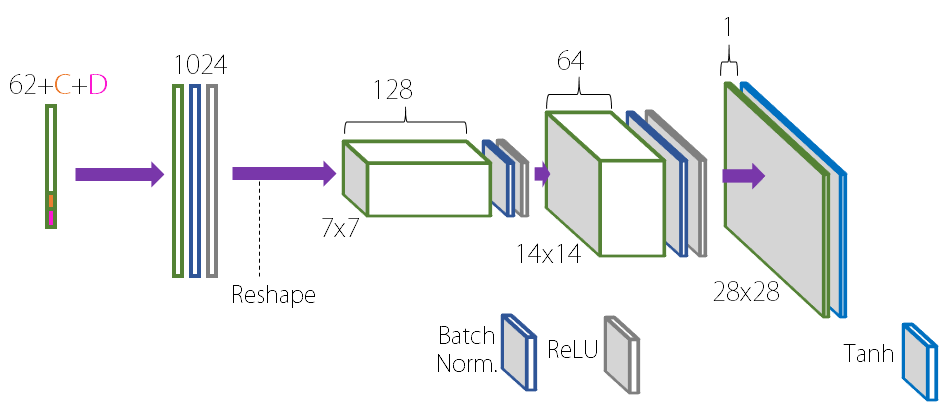

논문에서 나온 Table로도 바로 알 수 있지만, 해당 Generator를 그림으로 표현하면 이렇게 된다.

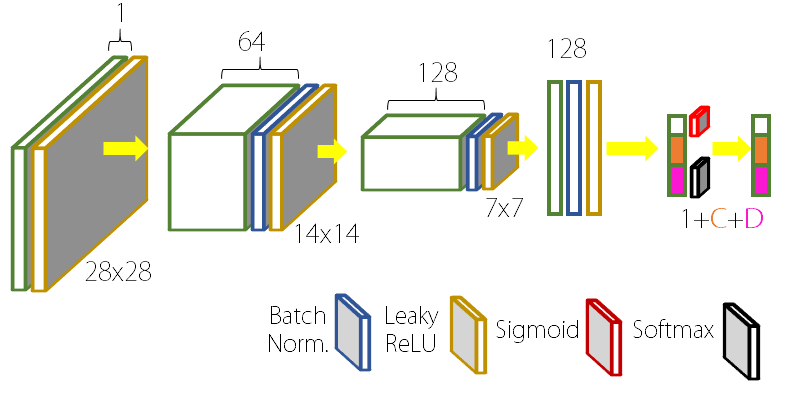

또한, Discriminator도 그림으로 표현하면 이렇게 된다. (참고로 위의 그림 둘다 MNIST에 해당한다.)

## **Implementation**

실제로 구현하는 과정에서는 Q를 신경망을 통해 만들어낸다. 일반적인 DCGAN에서 추가된 것이 output쪽에 Q network맊게 없다. 변수의 개수를 계산해보면 **기존 DCGAN의 parameter에서 고작 0.5%가 추가**됬기 때문에 기존의 GAN과 비교했을 해도 학습에 더 많은 시간이 걸리지 않는다. 그 이유는 **D**와 **Q**는 대부분의 네트워크를 공유하기 때문이다.


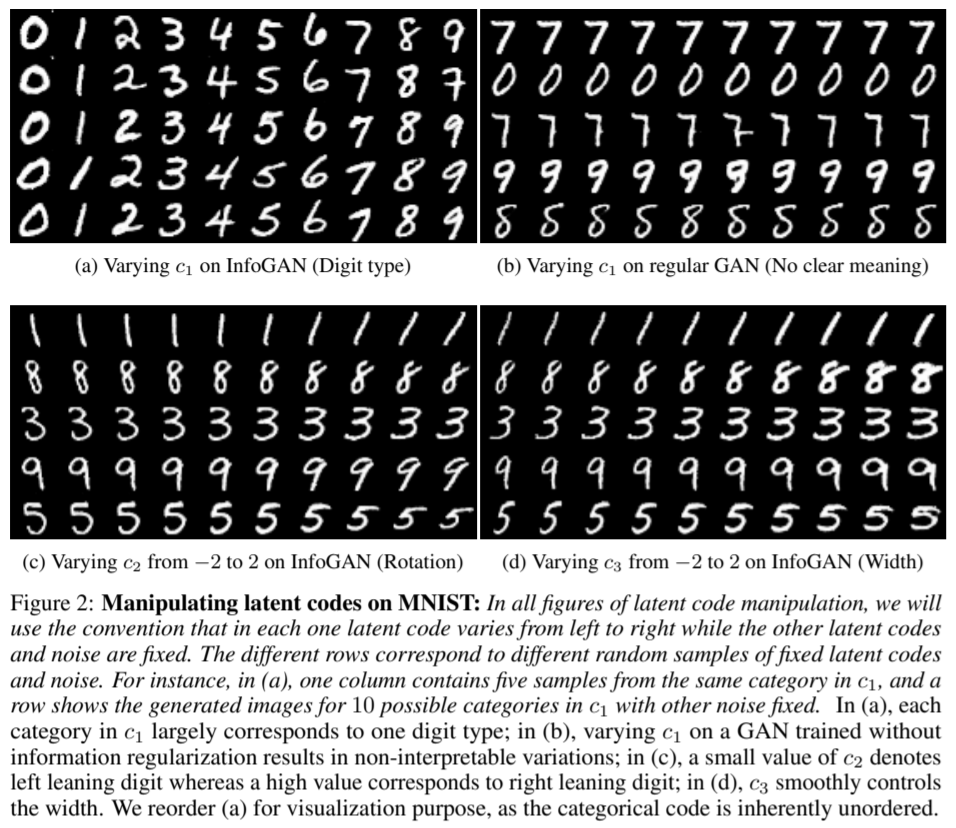

위의 Figure 2에서 (a), (c), (d)는 각각 InfoGAN에 대한 결과물을 보여준 것이고, (b)는 기존 GAN의 결과물을 보여줌으로써 비교를 한 것이다. c1은 0~9를 각각 0.1 확률로 뽑는 이산 확률 분포이며, c2와 c3은 -1 ~ 1 사이의 값을 갖는 uniform disctribution이다.

결과를 보면 c1와 c2, c3를 바꿀때마다 해당 특성에 따라 변하는 것을 알 수 있다. 덧붙여 c2와 c3을 변화시킬때, 단순히 원래 데이터에서 너비나 각도가 바뀌는 것이 아니라 진짜 데이터 같ㅌ게 약간씩 스타일이 달라지는 것도 보인다. 뿐만 아니라 -1 ~ 1 사이의 값들로 학습시켰지만, -2 ~ 2 사이의 범위에서도 대응할 수 있다. 이러한 특징을 보면 데이터가 잘 펄쳐져 있다고 판단할 수 있다.

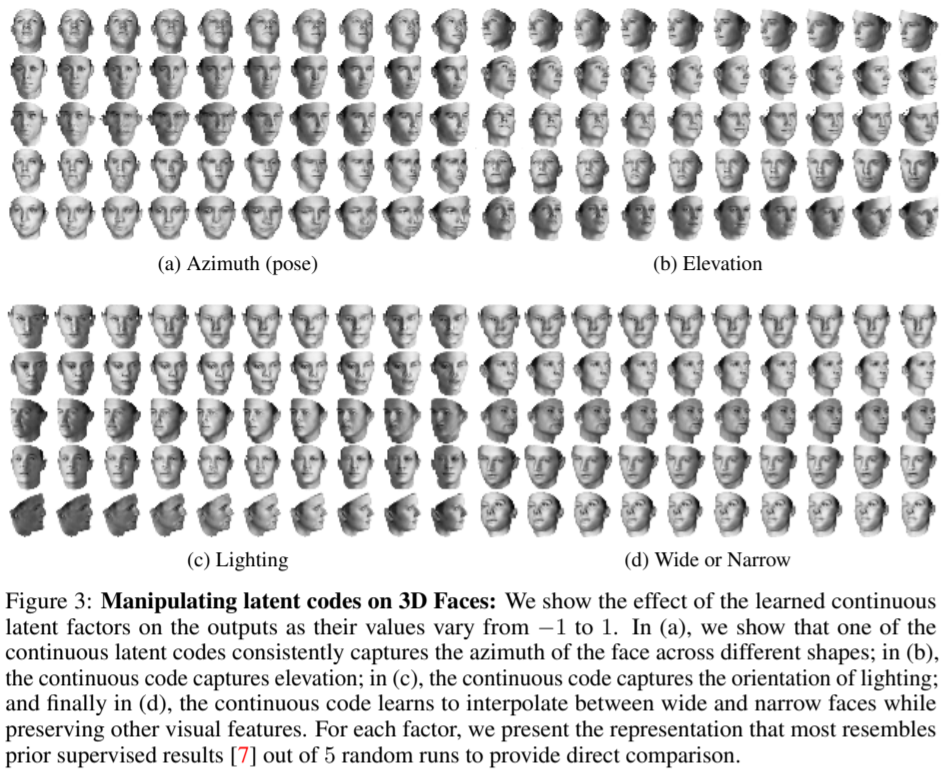

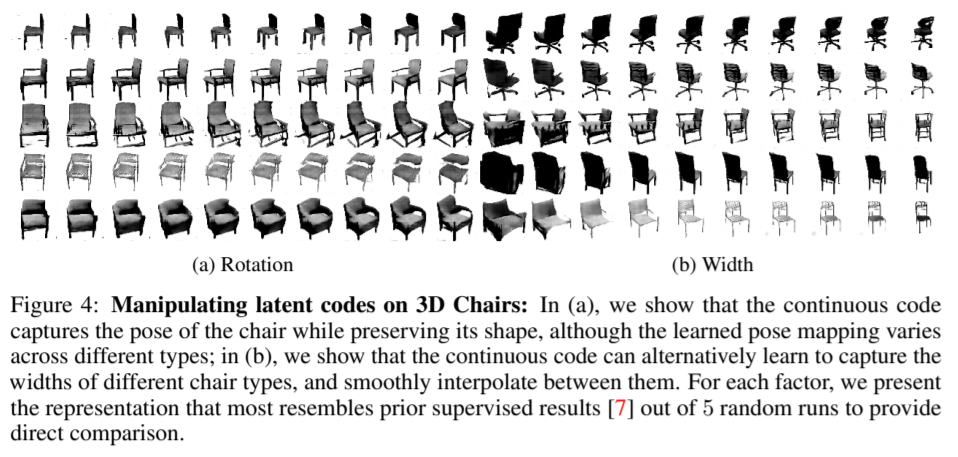

위의 Figure 3과 Figure 4을 보고 놀란 점이 각각 있었는데, 바로 얼굴이 회전하는 것에 비례하여 **음영이 지는 각도를 이해**하고 표현해낸다는 점이었다. 또한, 의자 데이터의 경우 **회전**이라는 특징을 잘 이해해 각도에 따라 항상 같은 의자가 있는 것이 아님에도 한 가지 의자의 모양을 잘 유지해냈다. 뿐만 아니라 **너비**를 변화하며 의자를 볼시 의자에서 소파로 바뀌는 등 자연스럽고 부드럽게 다른 종류로 변화하는 것을 볼 수 있다.

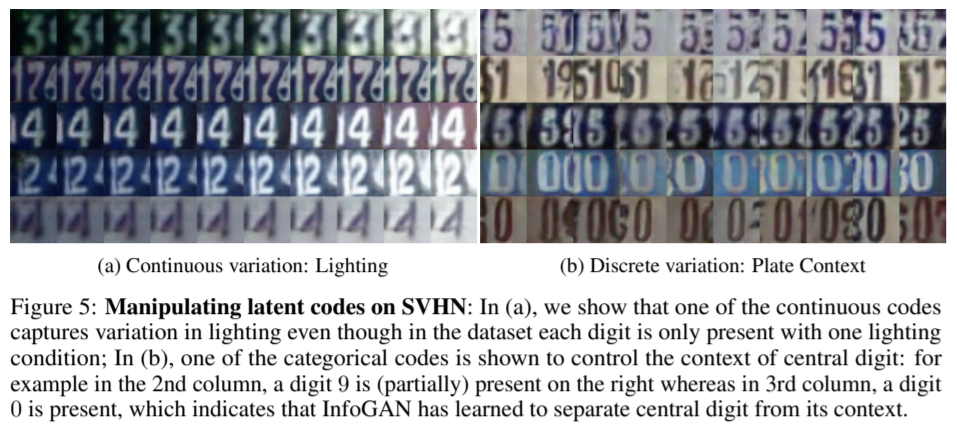

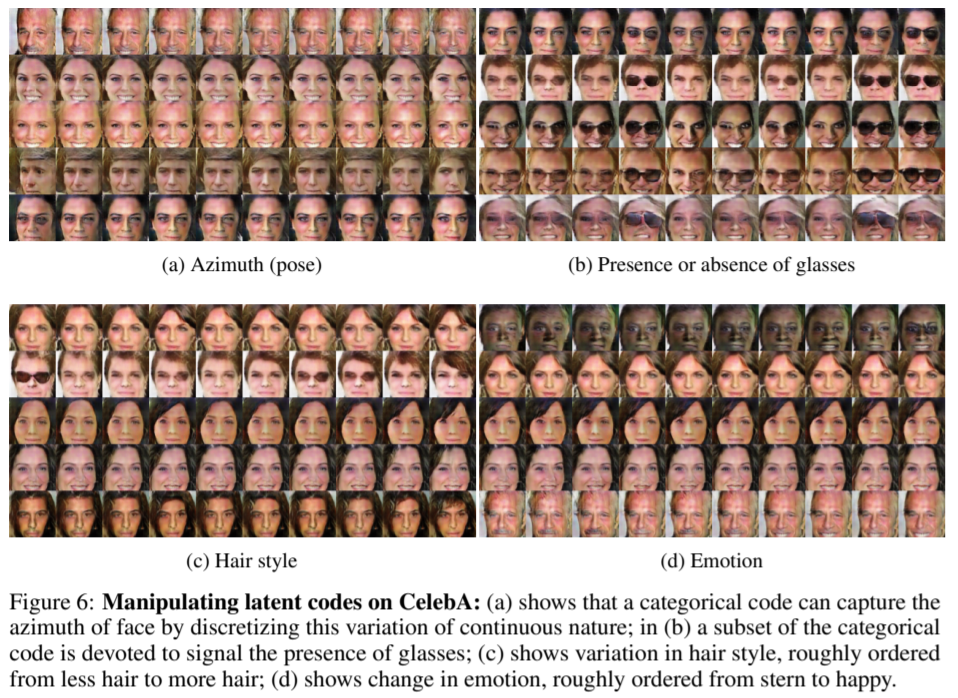

이처럼 Figure 1~6을 보면 여러 데이터셋에서 좋은 결과가 나왔다는 것을 확인할 수 있다.